# Gráficos

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Base de dados

In [ ]:
dataset = pd.read_csv('census.csv')
dataset.head()

age          workclass  final-weight  ... hour-per-week  native-country  income
0   39          State-gov         77516  ...            40   United-States   <=50K
1   50   Self-emp-not-inc         83311  ...            13   United-States   <=50K
2   38            Private        215646  ...            40   United-States   <=50K
3   53            Private        234721  ...            40   United-States   <=50K
4   28            Private        338409  ...            40            Cuba   <=50K

[5 rows x 15 columns]

## Gráfico de dispersão

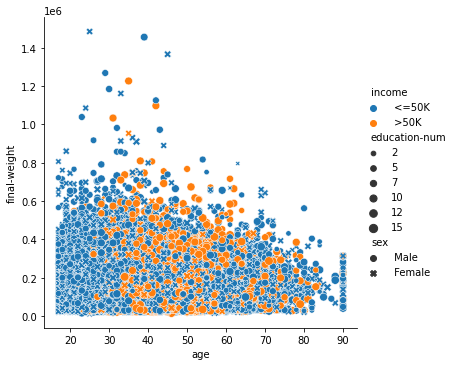

In [ ]:
sns.relplot(x = 'age', y = 'final-weight', data=dataset,
            hue = 'income', style = 'sex', size = 'education-num');

## Gráfico de barra e setor (pizza)

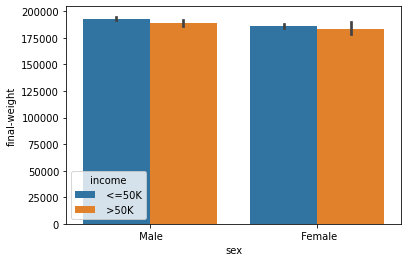

In [ ]:
sns.barplot(x = 'sex', y = 'final-weight', data=dataset, hue = 'income');

In [ ]:
dados_agrupados = dataset.groupby(['income'])['education-num'].sum()
dados_agrupados

income
 <=50K    237190
 >50K      91047
Name: education-num, dtype: int64

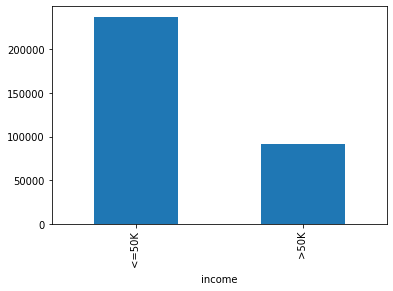

In [ ]:
dados_agrupados.plot.bar();

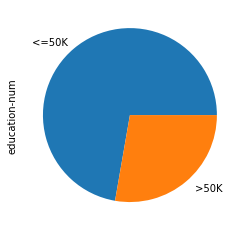

In [ ]:
dados_agrupados.plot.pie();

## Gráfico de linha

In [ ]:
vendas = {'mes': np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]),
          'valor': np.array([100, 200, 120, 300, 500, 198, 200, 209, 130, 500, 300, 120])}

In [ ]:
vendas_df = pd.DataFrame(vendas)
vendas_df

mes  valor
0     1    100
1     2    200
2     3    120
3     4    300
4     5    500
5     6    198
6     7    200
7     8    209
8     9    130
9    10    500
10   11    300
11   12    120

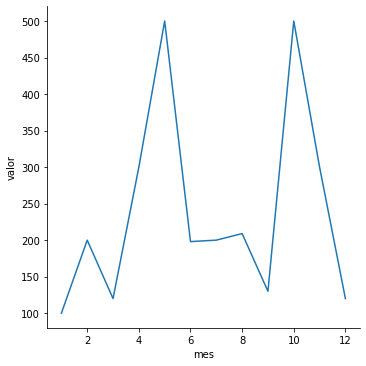

In [ ]:
sns.relplot(x = 'mes', y = 'valor', kind = 'line', data=vendas_df);

## Boxplot

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


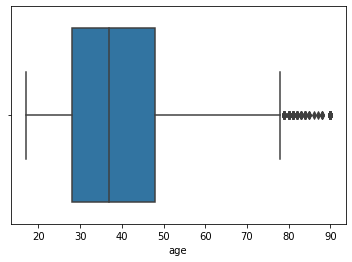

In [ ]:
sns.boxplot(dataset['age']);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


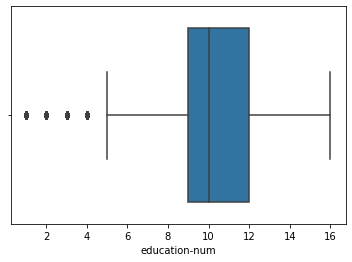

In [ ]:
sns.boxplot(dataset['education-num']);

In [ ]:
dataset2 = dataset.iloc[:, [0, 4, 12]]
dataset2.head()

age  education-num  hour-per-week
0   39             13             40
1   50             13             13
2   38              9             40
3   53              7             40
4   28             13             40

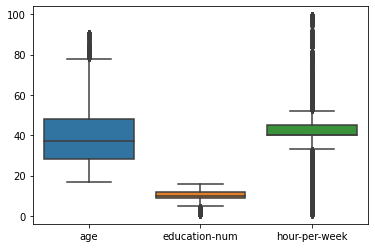

In [ ]:
sns.boxplot(data=dataset2);

## Gráficos com atributos categóricos

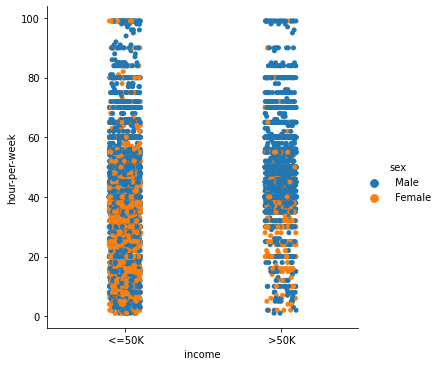

In [ ]:
sns.catplot(x = 'income', y = 'hour-per-week', data=dataset, hue = 'sex');

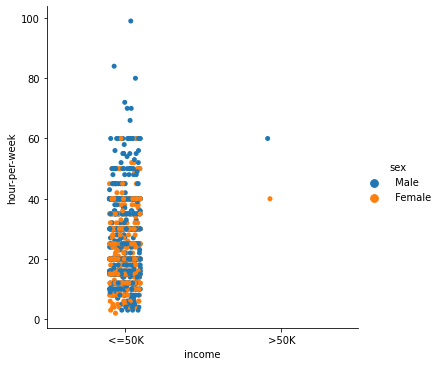

In [ ]:
sns.catplot(x = 'income', y = 'hour-per-week', 
            data=dataset.query('age < 20'), hue = 'sex');

## Subgráficos

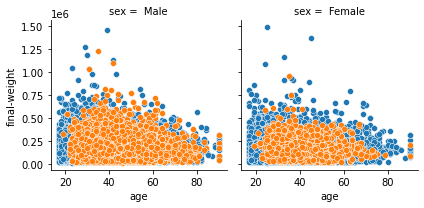

In [ ]:
g = sns.FacetGrid(dataset, col = 'sex', hue = 'income')
g.map(sns.scatterplot, 'age', 'final-weight');

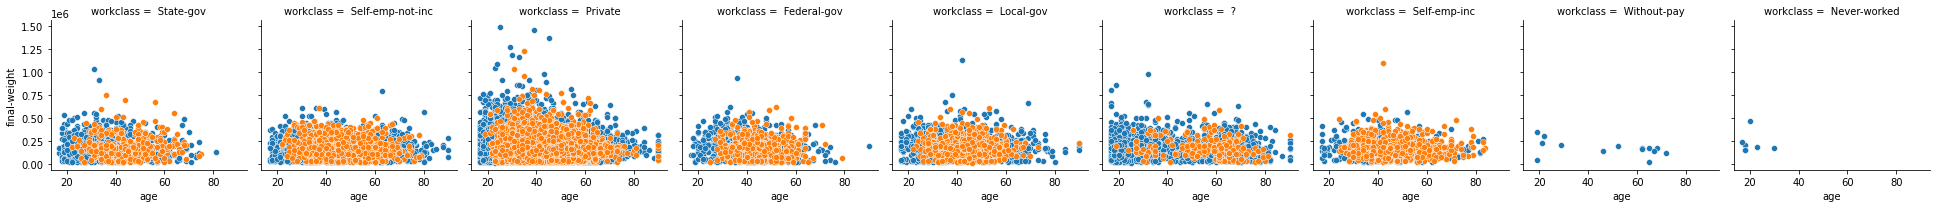

In [ ]:
g = sns.FacetGrid(dataset, col = 'workclass', hue = 'income')
g.map(sns.scatterplot, 'age', 'final-weight');

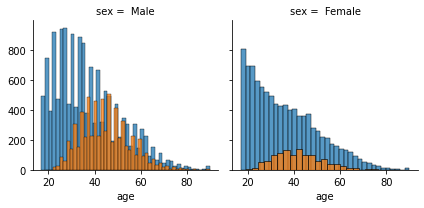

In [ ]:
g = sns.FacetGrid(dataset, col = 'sex', hue = 'income')
g.map(sns.histplot, 'age');

In [ ]:
dataset2.head()

age  education-num  hour-per-week
0   39             13             40
1   50             13             13
2   38              9             40
3   53              7             40
4   28             13             40

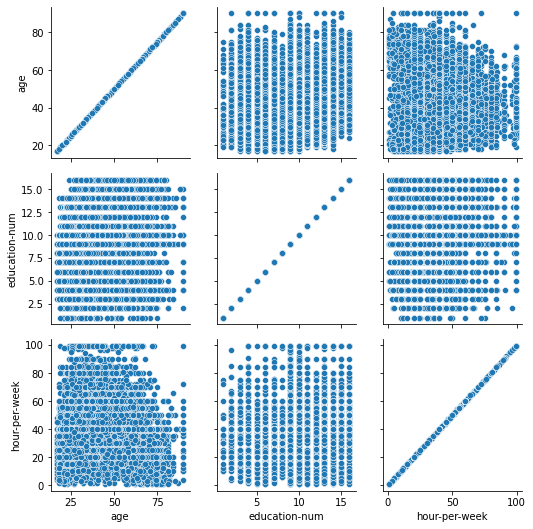

In [ ]:
g = sns.PairGrid(dataset2)
g.map(sns.scatterplot)

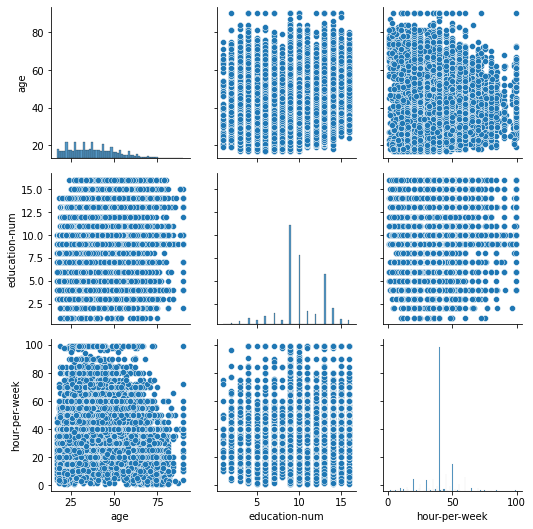

In [ ]:
g = sns.PairGrid(dataset2)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot);

## Mapa

In [ ]:
!apt-get install libgeos-3.5.0
!apt-get install libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip

In [ ]:
from mpl_toolkits.basemap import Basemap

In [ ]:
dataset = pd.read_csv('house_prices.csv')
dataset.head()

id             date     price  ...     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0  ... -122.257           1340        5650
1  6414100192  20141209T000000  538000.0  ... -122.319           1690        7639
2  5631500400  20150225T000000  180000.0  ... -122.233           2720        8062
3  2487200875  20141209T000000  604000.0  ... -122.393           1360        5000
4  1954400510  20150218T000000  510000.0  ... -122.045           1800        7503

[5 rows x 21 columns]

In [ ]:
dataset = dataset.sort_values(by = 'price', ascending = True)
dataset.head()

id             date    price  ...     long  sqft_living15  sqft_lot15
1149   3421079032  20150217T000000  75000.0  ... -121.906           1160       42882
15293    40000362  20140506T000000  78000.0  ... -122.280           1700       10387
465    8658300340  20140523T000000  80000.0  ... -121.909           1200        7500
16198  3028200080  20150324T000000  81000.0  ... -122.315            860        9000
8274   3883800011  20141105T000000  82000.0  ... -122.341           1140       11250

[5 rows x 21 columns]

In [ ]:
dataset.tail()

id             date  ...  sqft_living15  sqft_lot15
1448  8907500070  20150413T000000  ...           4600       21750
4411  2470100110  20140804T000000  ...           3560       24345
9254  9208900037  20140919T000000  ...           4540       42730
3914  9808700762  20140611T000000  ...           3930       25449
7252  6762700020  20141013T000000  ...           3940        8800

[5 rows x 21 columns]

In [ ]:
dataset_caros = dataset[0:1000]
dataset_caros

id             date  ...  sqft_living15  sqft_lot15
7252   6762700020  20141013T000000  ...           3940        8800
3914   9808700762  20140611T000000  ...           3930       25449
9254   9208900037  20140919T000000  ...           4540       42730
4411   2470100110  20140804T000000  ...           3560       24345
1448   8907500070  20150413T000000  ...           4600       21750
...           ...              ...  ...            ...         ...
7271   8965520190  20141030T000000  ...           3460       14566
9925   3623500049  20150501T000000  ...           2740       15000
5886   9808590460  20150218T000000  ...           2890       10572
19613  7525950110  20140828T000000  ...           4320       19500
17180  1126059108  20150423T000000  ...           2860       36460

[1000 rows x 21 columns]

In [ ]:
dataset_baratos = dataset[0:1000]
dataset_baratos

id             date  ...  sqft_living15  sqft_lot15
1149   3421079032  20150217T000000  ...           1160       42882
15293    40000362  20140506T000000  ...           1700       10387
465    8658300340  20140523T000000  ...           1200        7500
16198  3028200080  20150324T000000  ...            860        9000
8274   3883800011  20141105T000000  ...           1140       11250
...           ...              ...  ...            ...         ...
19285   844001145  20150326T000000  ...           1010        6160
303    5104530560  20150401T000000  ...           2370        4590
20819  3336500140  20140919T000000  ...           1390        2450
13595   425000175  20141013T000000  ...            960        5700
10795  1311800560  20141121T000000  ...           1340        7680

[1000 rows x 21 columns]

In [ ]:
dataset['lat'].describe()

count    21613.000000
mean        47.560053
std          0.138564
min         47.155900
25%         47.471000
50%         47.571800
75%         47.678000
max         47.777600
Name: lat, dtype: float64

In [ ]:
dataset['long'].describe()

count    21613.000000
mean      -122.213896
std          0.140828
min       -122.519000
25%       -122.328000
50%       -122.230000
75%       -122.125000
max       -121.315000
Name: long, dtype: float64

In [ ]:
lat1, lat2 = dataset['lat'].min(), dataset['lat'].max()
lon1, lon2 = dataset['long'].min(), dataset['long'].max()

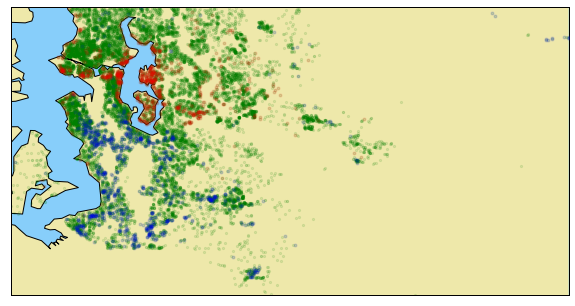

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
m = Basemap(projection='cyl', resolution='h',
            llcrnrlat = lat1, urcrnrlat = lat2,
            llcrnrlon = lon1, urcrnrlon = lon2)
m.drawcoastlines()
m.fillcontinents(color = 'palegoldenrod', lake_color='lightskyblue')
m.drawmapboundary(fill_color='lightskyblue')
m.scatter(dataset['long'], dataset['lat'], s = 5, c = 'green', alpha = 0.1, zorder = 2)
m.scatter(dataset_caros['long'], dataset_caros['lat'], s = 10, c = 'red', alpha = 0.1, zorder = 3)
m.scatter(dataset_baratos['long'], dataset_baratos['lat'], s = 10, c = 'blue', alpha = 0.1, zorder = 4)